### Counting K-mers from the sequence in fasta format

<img src="kmers.png" width="300">

A kmer is just a nucleotide sequence of a certain length.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import product

In [4]:
Counter(['AAG', 'AAG', 'TGG'])

Counter({'AAG': 2, 'TGG': 1})

In [10]:
list(product(['10', '12'], repeat = 3))

[('10', '10', '10'),
 ('10', '10', '12'),
 ('10', '12', '10'),
 ('10', '12', '12'),
 ('12', '10', '10'),
 ('12', '10', '12'),
 ('12', '12', '10'),
 ('12', '12', '12')]

In [12]:
with open('data_external/wuhan.fasta', 'r') as f:
    genome = ''.join([line.strip() for line in f.readlines()[1:]])

In [3]:
genome

'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTC

In [13]:
Counter([genome[i:i+2] for i in range(len(genome)) if len(genome[i:i+2]) == 2])

Counter({'AT': 2308,
         'TT': 3215,
         'TA': 2377,
         'AA': 2880,
         'AG': 1742,
         'GG': 1093,
         'GT': 1990,
         'AC': 2023,
         'CC': 888,
         'CT': 2081,
         'TC': 1413,
         'CA': 2084,
         'CG': 439,
         'GA': 1612,
         'TG': 2589,
         'GC': 1168})

In [15]:
def kmer_sequence(seq, k):
    my_dict = dict()
    counts = Counter(genome[i:i+k] for i in range(len(genome)) if len(genome[i:i+k]) == k)
    for k_mer in (''.join(t) for t in product('ACGT', repeat=k)):
        #print(f"count of {k_mer} is {counts[k_mer]}")
        my_dict[k_mer] = counts[k_mer]
    return my_dict
        

In [20]:
kmer_sequence(genome, 6)

{'AAAAAA': 30,
 'AAAAAC': 16,
 'AAAAAG': 22,
 'AAAAAT': 16,
 'AAAACA': 28,
 'AAAACC': 12,
 'AAAACG': 2,
 'AAAACT': 17,
 'AAAAGA': 26,
 'AAAAGC': 8,
 'AAAAGG': 13,
 'AAAAGT': 19,
 'AAAATA': 15,
 'AAAATC': 12,
 'AAAATG': 25,
 'AAAATT': 18,
 'AAACAA': 26,
 'AAACAC': 18,
 'AAACAG': 12,
 'AAACAT': 19,
 'AAACCA': 20,
 'AAACCC': 8,
 'AAACCG': 2,
 'AAACCT': 12,
 'AAACGA': 8,
 'AAACGC': 3,
 'AAACGG': 1,
 'AAACGT': 6,
 'AAACTA': 12,
 'AAACTC': 7,
 'AAACTG': 18,
 'AAACTT': 19,
 'AAAGAA': 25,
 'AAAGAC': 15,
 'AAAGAG': 10,
 'AAAGAT': 23,
 'AAAGCA': 8,
 'AAAGCC': 6,
 'AAAGCG': 0,
 'AAAGCT': 16,
 'AAAGGA': 16,
 'AAAGGC': 8,
 'AAAGGG': 3,
 'AAAGGT': 18,
 'AAAGTA': 9,
 'AAAGTC': 7,
 'AAAGTG': 19,
 'AAAGTT': 22,
 'AAATAA': 9,
 'AAATAC': 14,
 'AAATAG': 8,
 'AAATAT': 14,
 'AAATCA': 20,
 'AAATCC': 8,
 'AAATCG': 1,
 'AAATCT': 8,
 'AAATGA': 12,
 'AAATGC': 15,
 'AAATGG': 20,
 'AAATGT': 21,
 'AAATTA': 25,
 'AAATTC': 18,
 'AAATTG': 30,
 'AAATTT': 22,
 'AACAAA': 30,
 'AACAAC': 26,
 'AACAAG': 13,
 'AACAAT': 30,
 

<ipython-input-27-697579397862>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.keys(),rotation=90, fontsize = 10)


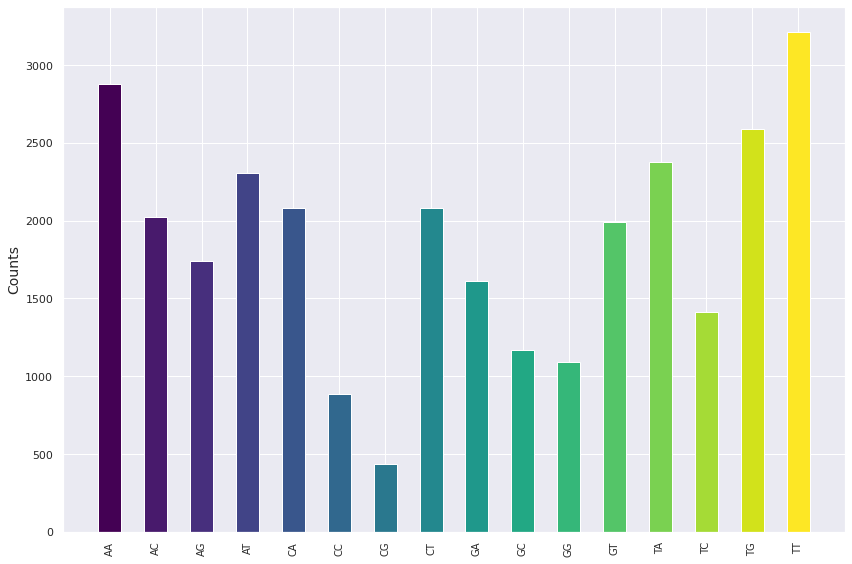

In [27]:
import seaborn as sns
from matplotlib import cm
sns.set(style = 'darkgrid')
data = kmer_sequence(genome, 2)
viridis = cm.get_cmap('viridis', len(data))
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(data.keys(), data.values(), color = viridis.colors, width = 0.5)

#ax.bar(wuhan_freq.keys(),wuhan_freq.values(), color = ['Black', 'Blue', 'Green', 'Yellow'])

ax.set_ylabel("Counts", fontsize = 14)
ax.set_xticklabels(data.keys(),rotation=90, fontsize = 10)
    
plt.tight_layout()